# Convolutional Neural Networks (CNN) using FASHION_MNIST

In [16]:
# Import necessary libs
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

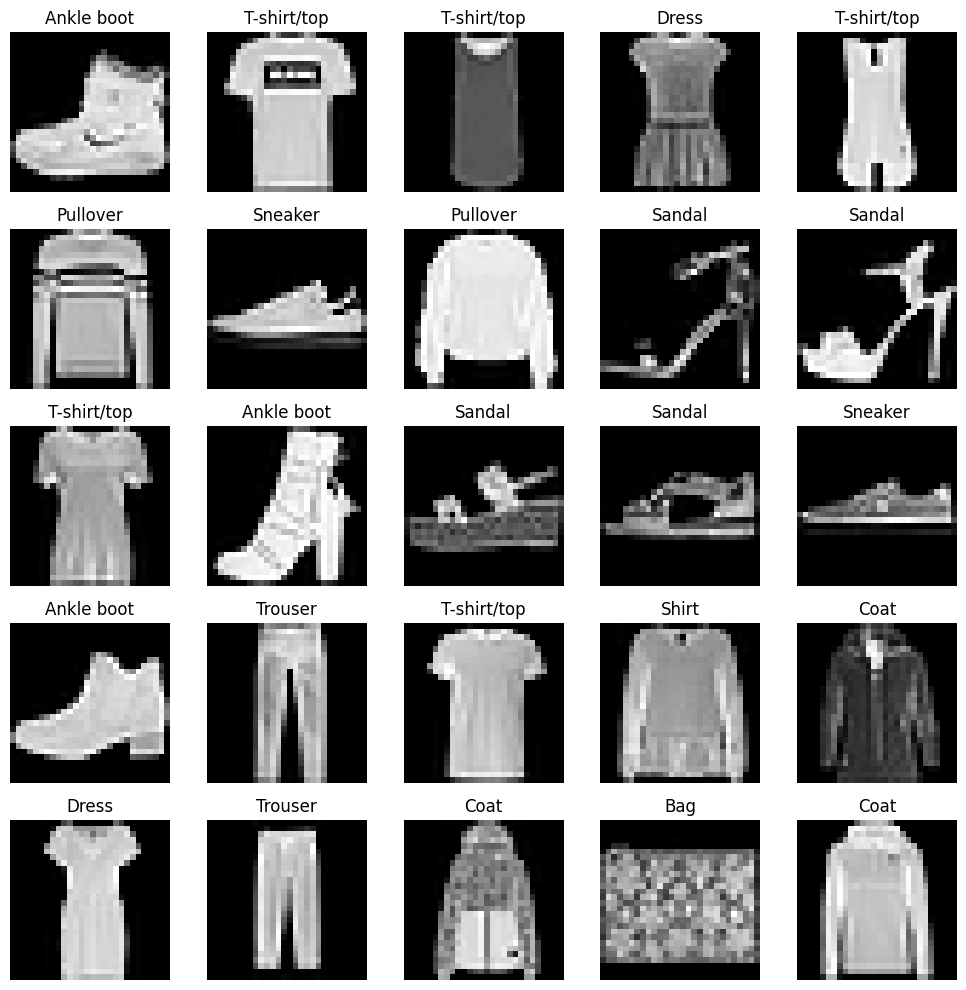

In [3]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Visualize the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Normalization

In [4]:
# Normalize pixel values to the range [0,1][0,1]
X_train = X_train / 255
X_test = X_test / 255

# Reshape for Conv2D (batch, height, width, channels)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## Model Architecture

In [5]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
DefaultConv2D = partial(tf.keras.layers.Conv2D,
                        kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')

In [7]:
# Build the CNN Model
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train the model

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 739s 490ms/step - accuracy: 0.5261 - loss: 1.2960 - val_accuracy: 0.8460 - val_loss: 0.4306
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 724s 478ms/step - accuracy: 0.8423 - loss: 0.4704 - val_accuracy: 0.8792 - val_loss: 0.3429
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 743s 479ms/step - accuracy: 0.8733 - loss: 0.3721 - val_accuracy: 0.8950 - val_loss: 0.2875
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 700s 451ms/step - accuracy: 0.8815 - loss: 0.3455 - val_accuracy: 0.8938 - val_loss: 0.2883
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 721s 477ms/step - accuracy: 0.8949 - loss: 0.3123 - val_accuracy: 0.9088 - val_loss: 0.2597
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 704s 452ms/step - accuracy: 0.9086 - loss: 0.2690 - val_accuracy: 0.9122 - val_loss: 0.2511
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 699s 466ms/step - accuracy: 0.9138 - loss: 0.2563 - val_accuracy: 0.9057 - val_loss: 0.2590
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 719s 479ms/step - ac

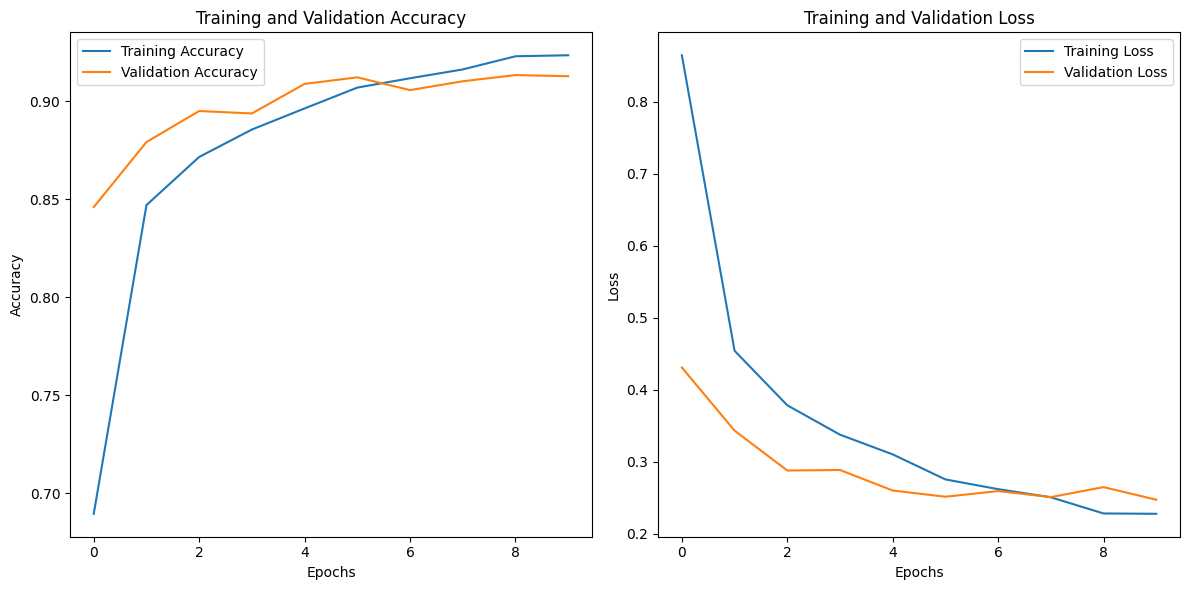

In [10]:
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Show the plots
plt.tight_layout()
plt.show()

## Evaluating and Predicting the model

In [11]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 36s - 114ms/step - accuracy: 0.9097 - loss: 0.2671

Test accuracy: 0.9096999764442444


In [13]:
# Predict on new data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step


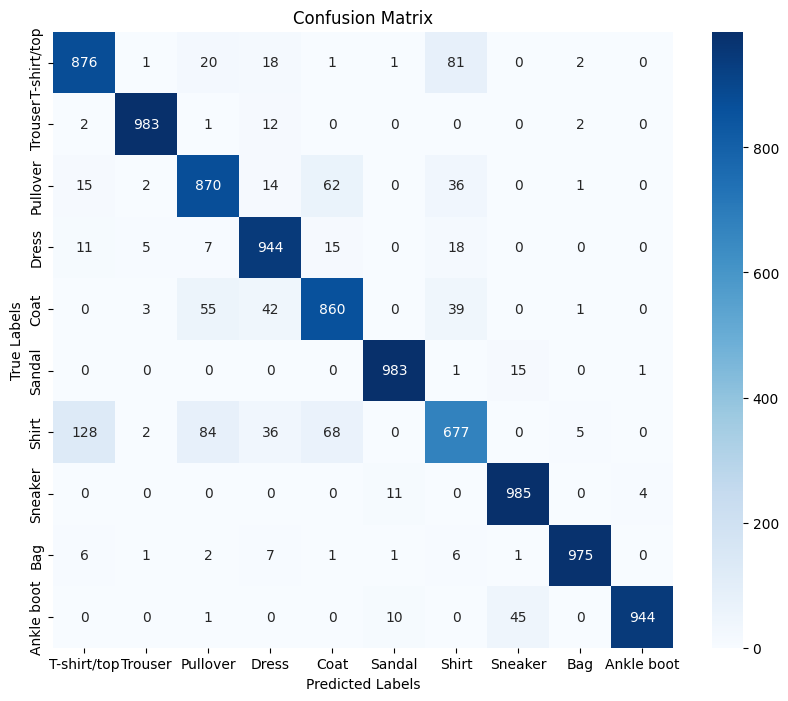

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.87      0.85      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.85      0.86      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.68      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

